### Importing and reading data from a file

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

eng_data = pd.read_csv("engine_file.csv",nrows = 722)

eng_data.head()

,Sr.No,Time,Crank Angle (deg),Piston_Effort\nFP1 (N),Piston_Effort\nFP2 (N),Piston_Effort\nFP3 (N),Connecting_Rod_Force FQ1 (N),Connecting_Rod_Force FQ2 (N),Connecting_Rod_Force FQ3 (N),Shear Force Pin_1,Shear Force Pin_2,Shear Force Pin_3,Slider_Force_FN1,Slider_Force_FN2,Slider_Force_FN3,Torque Nmm,Power Nmm/sec
0,1,0.00000,0,-22224.49,-22200.07,-22144.55,22445.29,23185.89,22383.95,22224.49,22200.07,22144.55,2770.0,-6580.0,3650.0,16028.69,201422.4590
1,2,0.00139,1,-22224.49,-22199.14,-22145.49,22433.30,23180.55,22401.23,22224.49,22199.14,22145.49,2660.0,-6570.0,3750.0,16002.90,201098.3723
2,3,0.00278,2,-22224.49,-22198.18,-22146.44,22421.70,23174.56,22418.76,22224.49,22198.18,22146.44,2560.0,-6550.0,3840.0,15969.57,200679.5352
3,4,0.00417,3,-22224.49,-22197.21,-22147.41,22410.50,23167.93,22436.53,22224.49,22197.21,22147.41,2460.0,-6540.0,3930.0,15928.73,200166.3246
4,5,0.00556,4,-22224.48,-22196.22,-22148.41,22399.70,23160.66,22454.53,22224.48,22196.22,22148.41,2350.0,-6520.0,4030.0,15880.44,199559.4946


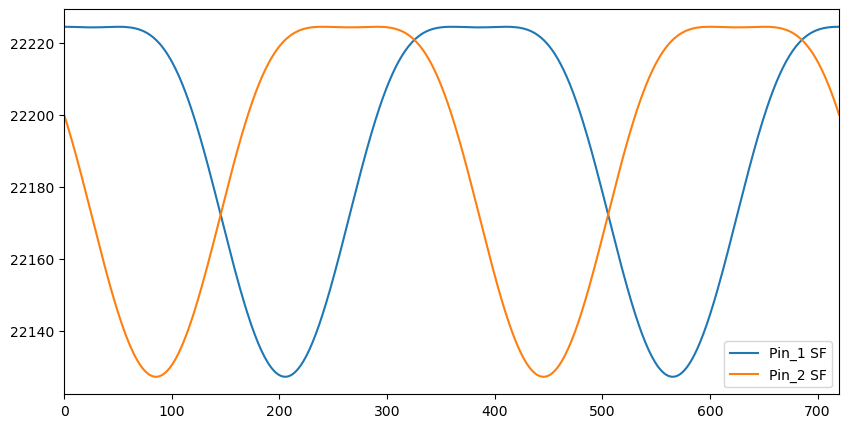

In [14]:
x1 = eng_data["Crank Angle (deg)"]
y1 = eng_data["Shear Force Pin_1"]
y2 = eng_data["Shear Force Pin_2"]

plt.figure(figsize=(10,5))
plt.plot(x1,y1,label="Pin_1 SF")
plt.plot(x1,y2,label="Pin_2 SF")
plt.xlim(0,720)
plt.legend()
plt.show()

### Data Filter Application

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

bearing_data = pd.read_csv("od.csv",skiprows=6)

bearing_data.head(10)

,Time,Acc
0,0.000000,-261.00
1,0.000021,2260.00
2,0.000043,-3040.00
3,0.000071,-16.40
4,0.000083,-6990.00
5,0.000105,-793.00
6,0.000126,52.70
7,0.000147,8.01
8,0.000167,192.00
9,0.000189,-451.00


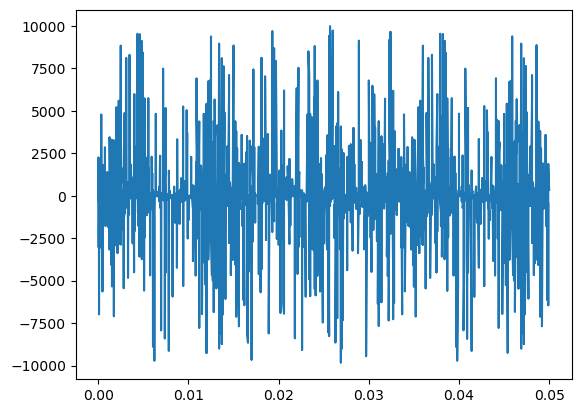

In [20]:
t = bearing_data["Time"]
accl = bearing_data["Acc"]

plt.plot(t,accl)
plt.show()

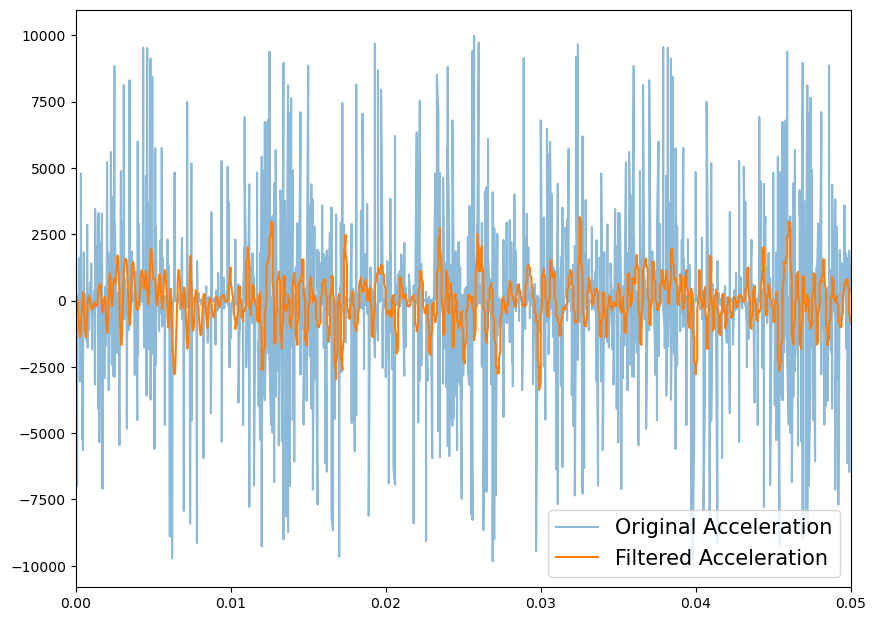

In [26]:
from scipy import signal

my_filt = signal.butter(5,50,'lp',fs=750,output='sos')
filt_accl = signal.sosfilt(my_filt,accl)

plt.figure(figsize=(10,7.5))
plt.plot(t,accl,label="Original Acceleration",alpha=0.5)
plt.plot(t,filt_accl,label="Filtered Acceleration")

plt.legend(fontsize = 15)
plt.xlim(0,0.05)
plt.show()

### FFT - Fast Fourier Transform

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

x = [1,2,3,4,5]
y = fftpack.fft(x)

z = fftpack.ifft(y)

print(z)

[1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j]


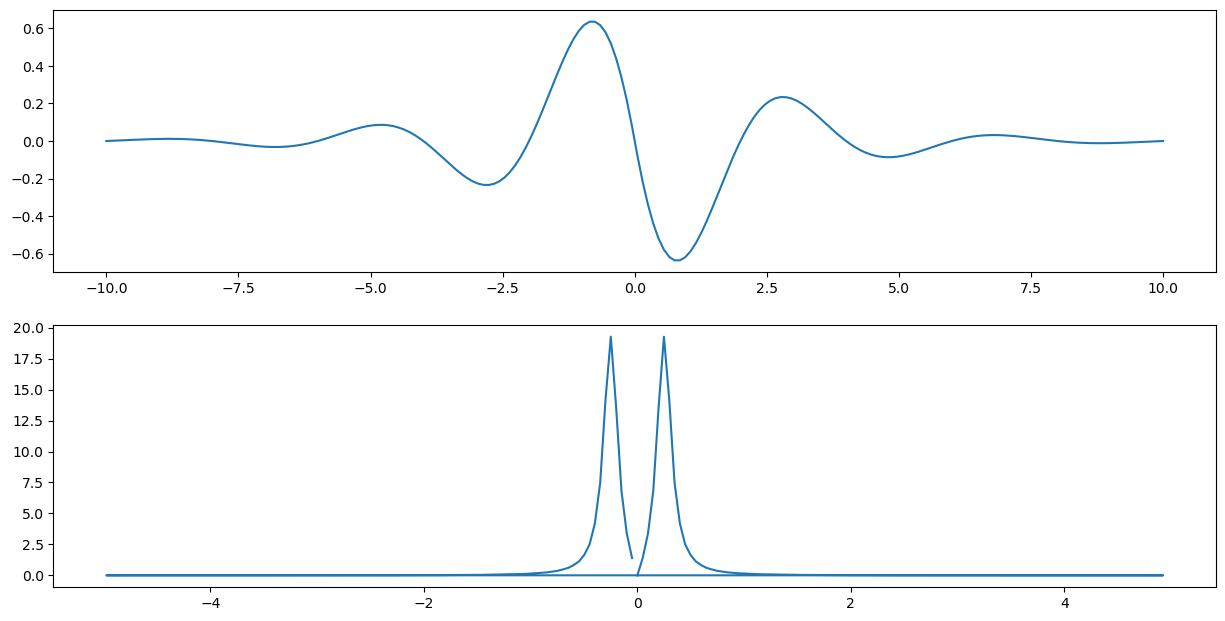

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

t = np.linspace(-10,10,200)
dt = t[1] - t[0]

freq = 50
width = 2
g = np.exp(-np.abs(t)/width) * np.sin(2*np.pi*freq*t)

G = fftpack.fft(g)
f = fftpack.fftfreq(g.size,d=dt)

plt.figure(figsize=(15,7.5))
plt.subplot(211)
plt.plot(t,g)

plt.subplot(212)
plt.plot(f,abs(G))
plt.show()

### Animating the Kinematic Mechanism - Pendulum Animation

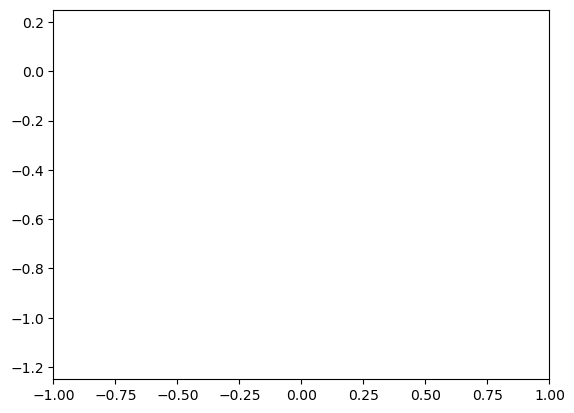

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as anm

def pendulum_motion(x,t):

    m = 2 # mass
    g = 9.81
    b = 0.15 # damping
    l = 1 # length of pendulum

    theta = x[0]
    dtheta = x[1]
    d2theta = -(b/m)*dtheta - (g/1)*np.sin(theta)

    return [dtheta,d2theta]

X0 = [np.pi/3,0]
time_step = 0.01
time = np.arange(0,10+time_step,time_step)
soln = odeint(pendulum_motion,X0,time)

theta = soln[:,0]
L = 1
x = L*np.sin(theta)
y = -L*np.cos(theta)

pend_fig = plt.figure()
ax = pend_fig.add_subplot()
ax.set_xlim(-L,L)
ax.set_ylim(-1.25*L,0.25)

line, = ax.plot([],[])
def pend_anim(i):
    xp = (0,x[i])
    yp = (0,y[i])
    line.se_xdata(xp)
    line.set_ydata(yp)

    return line

anim = anm.FuncAnimation(pend_fig,pend_anim,frames=len(soln),interval=0.01)
#plt.plot(time,theta*180/np.pi)
plt.show()